# Grid search CV, Cross conformal predictor & SVM

This assignment includes exploring and predicting data for the wine dataset and the USPS dataset

## Table of contents :
### 1.Creating pipelines and applying GridSearchCV 
1.1 Loading/ exploring the dataset (Task 1)<br>
1.2 Splitting the dataset (Task 2)<br>
1.3 Estimating the generalization accuracy of the MLPClassifier (Task 3) <br>
1.4 Modifying values for MLPClassifier (Task 4) <br>
1.5 Calculating generalisation accuracy using parameters (Task 5) <br>
1.6 Creating pipeline and calculating score by applying grid search (Task 6/7) <br>
1.7 Experimenting with StandardScaler, MinMaxScaler, RobustScaler, Normalizer <br>

### 2. Implementing the cross conformal predictor (Task 8)
2.1 Function to calculate cross conformity <br>
2.2 Calculating and plotting for Wine <br>
2.3 Calculating and plotting for USPS <br>

### 3. Conclusion & Values for cross conformal predictor

### 4. Implementing SVM
4.1 Estimating the generalization accuracy of the SVC (Task 3) <br>
4.2 Modifying values for SVC (Task 4) <br>
4.3 Calculating generalisation accuracy using parameters (Task 5) <br>
4.4 Creating pipeline and calculating score by applying grid search (Task 6/7) <br>
4.5 Experimenting with StandardScaler, MinMaxScaler, RobustScaler, Normalizer <br>


# 1. Implementation of the Cross conformal predictor

### 1.1 Loading/ Exploring the datasets (Task 1)

In [1]:
import numpy as np
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neural_network import MLPClassifier
import math
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MinMaxScaler, RobustScaler, Normalizer
np.set_printoptions(suppress=True)

In [2]:
# Wine
wine = load_wine()

# USPS
USPS_train = np.genfromtxt("train")
USPS_test = np.genfromtxt("test")
USPS_main = np.concatenate((USPS_train, USPS_test))

In [3]:
# WINE
print("WINE dataset details")
print("Shape : ", wine['data'].shape)
print("Feature Names : ",wine['feature_names'])
print("Labels : ",wine['target_names'])
print()

# USPS
print("USPS dataset details")
print("Shape : ",np.shape(USPS_main))
print("Sample row : ", USPS_main[np.random.choice(USPS_main.shape[0], size=1, replace=False), :])

WINE dataset details
Shape :  (178, 13)
Feature Names :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels :  ['class_0' 'class_1' 'class_2']

USPS dataset details
Shape :  (9298, 257)
Sample row :  [[ 2.    -1.    -1.    -1.    -1.    -0.558  0.933  0.053 -1.    -1.
  -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
  -1.     0.234  1.     0.911 -0.594 -1.    -1.    -1.    -1.    -1.
  -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.81  -0.003  0.885
   1.    -0.032 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
  -1.    -1.    -1.    -1.    -1.    -0.444  0.782  1.    -0.114 -1.
  -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
  -1.    -1.    -0.421  0.925  0.96  -0.402 -1.    -1.    -1.    -1.
  -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.476
   0.89

### 1.2 Splitting the datasets (Task 2)

In [4]:
# WINE
X_train, X_test, y_train, y_test = train_test_split(wine['data'],wine['target'], random_state=2110)

# USPS
X_train_USPS, X_test_USPS, y_train_USPS, y_test_USPS = train_test_split(USPS_main[:,1:257], USPS_main[:,0], random_state=2110)


### 1.3 Estimating the generalization accuracy of the MLPClassifier (Task 3)

In [5]:
mlp = MLPClassifier(random_state=2110).fit(X_train, y_train)
calculatedScoreList = cross_val_score(mlp, X_train, y_train, cv = 5)
finalScore = np.mean(calculatedScoreList)
print("Error rate Wine: ",finalScore)

mlp_USPS = MLPClassifier(random_state=2110).fit(X_train_USPS, y_train_USPS)
calculatedScoreList_USPS = cross_val_score(mlp_USPS, X_train_USPS, y_train_USPS, cv = 5)
finalScore_USPS = np.mean(calculatedScoreList_USPS)
print("Error rate USPS: ",finalScore_USPS)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Error rate Wine:  0.7652421652421653
Error rate USPS:  0.9645798943757938


For default values of the MLPClassifier we can get a score of 0.7652421652421653 with warnings. We thus compute the accuracy for a changed number of maximum iterations, by adding the activation using 'tanh' and solver as 'lbfgs'.

### 1.4 Modifying values for MLPClassifier (Task 4)

In [6]:
mlp = MLPClassifier(random_state=2110, 
                    max_iter=1500).fit(X_train, y_train)
calculatedScoreList = cross_val_score(mlp, X_train, y_train, cv = 5)
crossValFinalScore = np.mean(calculatedScoreList)
print("(Wine) Generalisation accuracy for X train using default MLP activation and solver is : ", crossValFinalScore)

mlp_USPS = MLPClassifier(random_state=2110, 
                    max_iter=1500).fit(X_train_USPS, y_train_USPS)
calculatedScoreList_USPS = cross_val_score(mlp_USPS, X_train_USPS, y_train_USPS, cv = 5)
crossValFinalScore_USPS = np.mean(calculatedScoreList_USPS)
print("(USPS) Generalisation accuracy for X train using default MLP activation and solver is : ", crossValFinalScore_USPS)

(Wine) Generalisation accuracy for X train using default MLP activation and solver is :  0.7874643874643874
(USPS) Generalisation accuracy for X train using default MLP activation and solver is :  0.9645798943757938


In [7]:
mlpFinalScore = mlp.score(X_test, y_test)
print("(Wine) Test error rate for the default MLP classifier is : ", mlpFinalScore)
mlpFinalScore_USPS = mlp_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Test error rate for the default MLP classifier is : ", mlpFinalScore_USPS)

(Wine) Test error rate for the default MLP classifier is :  0.5111111111111111
(USPS) Test error rate for the default MLP classifier is :  0.963010752688172


### 1.5 Calculating generalisation accuracy using parameters (Task 5)

In [8]:
mlp = MLPClassifier(random_state=2110, activation = 'tanh', solver = 'lbfgs',
                    max_iter=10000).fit(X_train, y_train)
calculatedScoreList = cross_val_score(mlp, X_train, y_train, cv = 5)
crossValFinalScore = np.mean(calculatedScoreList)
print("(Wine) Generalisation accuracy for X train using activation tanh and solver lbfgs is : ", crossValFinalScore)

mlp = MLPClassifier(random_state=2110, activation = 'tanh', solver = 'lbfgs',
                    max_iter=10000).fit(X_train, y_train)
mlpFinalScore = mlp.score(X_test, y_test)
print("(Wine) Test error rate for the MLP classifier using activation tanh and solver lbfgs is : ", mlpFinalScore)
print()

mlp_USPS = MLPClassifier(random_state=2110, activation = 'tanh', solver = 'lbfgs',
                    max_iter=10000).fit(X_train_USPS, y_train_USPS)
calculatedScoreList_USPS = cross_val_score(mlp_USPS, X_train_USPS, y_train_USPS, cv = 5)
crossValFinalScore_USPS = np.mean(calculatedScoreList_USPS)
print("(USPS) Generalisation accuracy for X train using activation tanh and solver lbfgs is : ", crossValFinalScore_USPS)

mlp_USPS = MLPClassifier(random_state=2110, activation = 'tanh', solver = 'lbfgs',
                    max_iter=10000).fit(X_train_USPS, y_train_USPS)
mlpFinalScore_USPS = mlp_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Test error rate for the MLP classifier using activation tanh and solver lbfgs is : ", mlpFinalScore_USPS)



(Wine) Generalisation accuracy for X train using activation tanh and solver lbfgs is :  0.9247863247863247
(Wine) Test error rate for the MLP classifier using activation tanh and solver lbfgs is :  0.9555555555555556

(USPS) Generalisation accuracy for X train using activation tanh and solver lbfgs is :  0.9502385543779537
(USPS) Test error rate for the MLP classifier using activation tanh and solver lbfgs is :  0.9466666666666667


For default values of MLPClassifier the estimate is 0.7874 while the score from the default MLPClassifier is 0.511.  Upon comparing the estimates after setting activation as tanh and solver as lbfgs we can conclude that the dataset is significantly small causing overfitting which leads to a higher value for the test set. The values after setting activation and solver as tanh and lbfgs the new estimates are 0.9247863247863247 for the generalisation accuracy and 0.9555555555555556 for the test score. For the USPS dataset the values decrease for the test set as the data is significantly high. 

### 1.6 Creating pipeline and calculating score using applying grid search (Task 6/ 7)

In [9]:
standardPipe = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
standardPipe.fit(X_train, y_train)
standardPipeTestScore = standardPipe.score(X_test, y_test)
param_grid = {'mlp__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
standardGrid = GridSearchCV(standardPipe, param_grid, cv=5, n_jobs= -2)
standardGrid.fit(X_train, y_train)
print("(Wine) Pipe score for StandardScaler : ",standardPipeTestScore)
print("(Wine) Grid score for StandardScaler : ",standardGrid.score(X_test, y_test))
print("(Wine) Best params for StandardScaler : ",standardGrid.best_params_)
print()

normalPipe = Pipeline([("scaler", Normalizer()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
normalPipe.fit(X_train, y_train)
normalPipeTestScore = normalPipe.score(X_test, y_test)
param_grid = {'mlp__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
normalGrid = GridSearchCV(normalPipe, param_grid, cv=5, n_jobs= -2)
normalGrid.fit(X_train, y_train)
print("(Wine) Pipe score for Normalizer : ",normalPipeTestScore)
print("(Wine) Grid score for Normalizer : ",normalGrid.score(X_test, y_test))
print("(Wine) Best params for Normalizer : ",normalGrid.best_params_)
print()

standardPipe_USPS = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
standardPipe_USPS.fit(X_train_USPS, y_train_USPS)
standardPipeTestScore_USPS = standardPipe_USPS.score(X_test_USPS, y_test_USPS)
standardGrid_USPS = GridSearchCV(standardPipe_USPS, param_grid, cv=5, n_jobs= -2)
standardGrid_USPS.fit(X_train_USPS, y_train_USPS)
print("(USPS) Pipe score for StandardScaler : ",standardPipeTestScore_USPS)
print("(USPS) Grid score for StandardScaler : ",standardGrid_USPS.score(X_test_USPS, y_test_USPS))
print("(USPS) Best params for StandardScaler : ",standardGrid_USPS.best_params_)
print()

normalPipe_USPS = Pipeline([("scaler", Normalizer()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
normalPipe_USPS.fit(X_train_USPS, y_train_USPS)
normalPipeTestScore_USPS = normalPipe_USPS.score(X_test_USPS, y_test_USPS)
normalGrid_USPS = GridSearchCV(normalPipe_USPS, param_grid, cv=5, n_jobs= -2)
normalGrid_USPS.fit(X_train_USPS, y_train_USPS)
print("(USPS) Pipe score for Normalizer : ",normalPipeTestScore_USPS)
print("(USPS) Grid score for Normalizer : ",normalGrid_USPS.score(X_test_USPS, y_test_USPS))
print("(USPS) Best params for Normalizer : ",normalGrid_USPS.best_params_)
print()

(Wine) Pipe score for StandardScaler :  0.9777777777777777
(Wine) Grid score for StandardScaler :  0.9777777777777777
(Wine) Best params for StandardScaler :  {'mlp__alpha': 1}

(Wine) Pipe score for Normalizer :  0.9111111111111111
(Wine) Grid score for Normalizer :  0.9111111111111111
(Wine) Best params for Normalizer :  {'mlp__alpha': 0.001}

(USPS) Pipe score for StandardScaler :  0.9634408602150538
(USPS) Grid score for StandardScaler :  0.9664516129032258
(USPS) Best params for StandardScaler :  {'mlp__alpha': 0.1}

(USPS) Pipe score for Normalizer :  0.96
(USPS) Grid score for Normalizer :  0.9621505376344086
(USPS) Best params for Normalizer :  {'mlp__alpha': 0.01}



### 1.7 Experimenting with StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [10]:
minMaxPipe = Pipeline([("scaler", MinMaxScaler()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
minMaxPipe.fit(X_train, y_train)
minMaxPipeTestScore = minMaxPipe.score(X_test, y_test)
print("(Wine) Pipe test score for MinMaxScaler : ", minMaxPipeTestScore)
robustPipe = Pipeline([("scaler", RobustScaler()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
robustPipe.fit(X_train, y_train)
robustPipeTestScore = robustPipe.score(X_test, y_test)
print("(Wine) Pipe test score for RobustScaler : ", robustPipeTestScore)
noramlPipe = Pipeline([("scaler", Normalizer()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
noramlPipe.fit(X_train, y_train)
normalPipeTestScore = noramlPipe.score(X_test, y_test)
print("(Wine) Pipe test score for Normalizer : ", normalPipeTestScore)
print()
minMaxPipe_USPS = Pipeline([("scaler", MinMaxScaler()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
minMaxPipe_USPS.fit(X_train_USPS, y_train_USPS)
minMaxPipeTestScore_USPS = minMaxPipe_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Pipe test score for MinMaxScaler : ", minMaxPipeTestScore_USPS)
robustPipe_USPS = Pipeline([("scaler", RobustScaler()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
robustPipe_USPS.fit(X_train_USPS, y_train_USPS)
robustPipeTestScore_USPS = robustPipe_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Pipe test score for RobustScaler : ", robustPipeTestScore_USPS)
noramlPipe_USPS = Pipeline([("scaler", Normalizer()), ("mlp", MLPClassifier(random_state=2110, max_iter=10000))])
noramlPipe_USPS.fit(X_train_USPS, y_train_USPS)
normalPipeTestScore_USPS = noramlPipe_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Pipe test score for Normalizer : ", normalPipeTestScore_USPS)

(Wine) Pipe test score for MinMaxScaler :  0.9777777777777777
(Wine) Pipe test score for RobustScaler :  0.9777777777777777
(Wine) Pipe test score for Normalizer :  0.9111111111111111

(USPS) Pipe test score for MinMaxScaler :  0.9625806451612903
(USPS) Pipe test score for RobustScaler :  0.9505376344086022
(USPS) Pipe test score for Normalizer :  0.96


Upon observing the pipe test scores for each type of scaler we conclude that for the Wine dataset the MinMaxScaler, RobustScaler and the StandardScaler have the same scores and any one can be used whereas for the USPS dataset the highest score is for the StandardScaler and we can use it for our further observations. 

# 2. Implementing the cross conformal predictor (Task 8)

### 2.1 Creating folds

In [11]:
'''
    input arguments - 
        no of folds
        train set
        train labels
        grid object
        test set
    
    output arguments - 
        final p value list 
        matrix with p values   
'''
def crossConformalPredictor(n, trainSet, labelSet, standardGrid, testSet):
    
    # compute folds 
    kf = KFold(n_splits=5,shuffle=True,random_state=2110)
    finalPValueList = []
    
    mainMatrix = np.zeros(shape=(testSet.shape[0],len(np.unique(labelSet))))
    
    # for each fold run the following 
    for rest_index, fold_index in kf.split(trainSet):
        
        # get X rest and X fold, Y rest and Y fold
        X_rest, X_fold = trainSet[rest_index], trainSet[fold_index]
        y_rest, y_fold = labelSet[rest_index], labelSet[fold_index] 
        
        # fit current fold to GridSearch obj
        standardGrid.fit(X_rest, y_rest)
        predLabelList = []
        falsePValueList = []
        
        for testSample in range(testSet.shape[0]):
            # append test sample to current fold
            currentFold = X_fold
            currentFold = np.append(currentFold, [testSet[testSample,:]], axis = 0)
               
            # get probability list of test sample
            pValueList = list(standardGrid.predict_proba(currentFold)[-1])
            
            # compute sum of probabilites for all folds
            mainMatrix[testSample,:] += standardGrid.predict_proba(currentFold)[-1]
            
            # appending to false p value list
            pValueList.remove(max(pValueList))
            falsePValueList.extend(pValueList)
        
        # getting total average of all false p values for each fold
        finalPValueList.append(np.mean(falsePValueList))
        
    return finalPValueList, mainMatrix/kf.get_n_splits()

### 2.2 Calculating and plotting for Wine

Total average false p value : 
0.024059398276700054


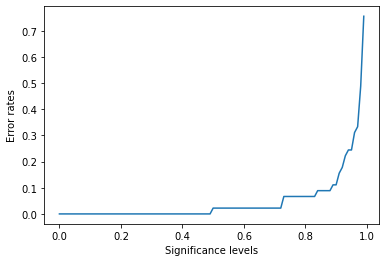

In [12]:
falsePValueList, mainMatrix  = crossConformalPredictor(5, X_train, y_train, standardGrid, X_test)

# computing significance level and error rates based on Lab 9
eps = np.zeros(100)  
err = np.zeros(100) 
for k in range(100):
    eps[k] = k/100 
    err[k] = 0 
    for j in range(y_test.shape[0]):
        if (mainMatrix[j,y_test[j]] <= eps[k]): 
            err[k] = err[k] + 1 
    err[k] = err[k] / y_test.shape[0] 
plt.plot(eps,err)
plt.xlabel('Significance levels')
plt.ylabel('Error rates')

print("Total average false p value : ")
print(np.mean(falsePValueList))

### 2.2 Calculating and plotting for USPS

Total average false p value : 
0.003116466840637911


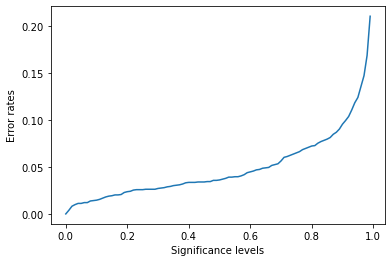

In [13]:
falsePValueList, mainMatrix  = crossConformalPredictor(5, X_train_USPS, y_train_USPS, standardGrid_USPS, X_test_USPS)

# computing significance level and error rates based on Lab 9
eps = np.zeros(100)  
err = np.zeros(100) 
for k in range(100):
    eps[k] = k/100 
    err[k] = 0 
    for j in range(y_test_USPS.shape[0]):
        if (mainMatrix[j,int(y_test_USPS[j])] <= eps[k]): 
            err[k] = err[k] + 1 
    err[k] = err[k] / y_test_USPS.shape[0] 
plt.plot(eps,err)
plt.xlabel('Significance levels')
plt.ylabel('Error rates')

print("Total average false p value : ")
print(np.mean(falsePValueList))

# 3. Conclusion & Values for cross conformal predictor

Cross val score for default values (no random state) of MLP (Wine):  0.7652421652421653 <br>
Cross val score default values (no random state) of MLP (USPS):  0.9645798943757938 <br>
<br>
(Wine) Generalisation accuracy for X train using default MLP activation and solver is :  0.7874643874643874<br>
(USPS) Generalisation accuracy for X train using default MLP activation and solver is :  0.9645798943757938<br>
<br>
(Wine) Generalisation accuracy for X train using activation tanh and solver lbfgs is :  0.9247863247863247<br>
(Wine) Test error rate for the MLP classifier using activation tanh and solver lbfgs is :  0.9555555555555556<br>
<br>
(USPS) Generalisation accuracy for X train using activation tanh and solver lbfgs is :  0.9502385543779537<br>
(USPS) Test error rate for the MLP classifier using activation tanh and solver lbfgs is :  0.9466666666666667<br>
<br>
(Wine) Pipe score for StandardScaler :  0.9777777777777777<br>
(Wine) Grid score for StandardScaler :  0.9777777777777777<br>
(Wine) Best params for StandardScaler :  {'mlp__alpha': 1}<br>
<br>
(Wine) Pipe score for Normalizer :  0.9111111111111111<br>
(Wine) Grid score for Normalizer :  0.9111111111111111<br>
(Wine) Best params for Normalizer :  {'mlp__alpha': 0.001}<br>
<br>
(USPS) Pipe score for StandardScaler :  0.9634408602150538<br>
(USPS) Grid score for StandardScaler :  0.9664516129032258<br>
(USPS) Best params for StandardScaler :  {'mlp__alpha': 0.1}<br>
<br>
(USPS) Pipe score for Normalizer :  0.96<br>
(USPS) Grid score for Normalizer :  0.9621505376344086<br>
(USPS) Best params for Normalizer :  {'mlp__alpha': 0.01}<br>
<br>
(Wine) Pipe test score for MinMaxScaler :  0.9777777777777777<br>
(Wine) Pipe test score for RobustScaler :  0.9777777777777777<br>
(Wine) Pipe test score for Normalizer :  0.9111111111111111<br>
<br>
(USPS) Pipe test score for MinMaxScaler :  0.9625806451612903<br>
(USPS) Pipe test score for RobustScaler :  0.9505376344086022<br>
(USPS) Pipe test score for Normalizer :  0.96<br>
<br>
Total average false p value (Wine) : <br>
0.024059398276700054<br>
<br>
Total average false p value (USPS) : <br>
0.003116466840637911<br>

# 4. Implementing SVM

### 4.1 Estimating the generalization accuracy of the SVC (Task 3) 

In [14]:
from sklearn.svm import SVC

# Wine
svc = SVC(random_state=2110, max_iter=1500).fit(X_train, y_train)
calculatedScoreList = cross_val_score(svc, X_train, y_train, cv = 5)
crossValFinalScore = np.mean(calculatedScoreList)
print("(Wine) Generalisation accuracy for X train using default SVC is : ", crossValFinalScore)

#USPS
svc_USPS = SVC(random_state=2110, max_iter=1500).fit(X_train_USPS, y_train_USPS)
calculatedScoreList_USPS = cross_val_score(svc_USPS, X_train_USPS, y_train_USPS, cv = 5)
crossValFinalScore_USPS = np.mean(calculatedScoreList_USPS)
print("(USPS) Generalisation accuracy for X train using default SVC is : ", crossValFinalScore_USPS)


(Wine) Generalisation accuracy for X train using default MLP activation and solver is :  0.7065527065527066
(USPS) Generalisation accuracy for X train using default MLP activation and solver is :  0.971749175935782


In [15]:
svcFinalScore = svc.score(X_test, y_test)
print("(Wine) Test error rate for the default SVC is : ", svcFinalScore)
svcFinalScore_USPS = svc_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Test error rate for the default SVC  is : ", svcFinalScore_USPS)

(Wine) Test error rate for the default MLP classifier is :  0.5777777777777777
(USPS) Test error rate for the default MLP classifier is :  0.9724731182795698


### Creating pipeline and calculating score using applying grid search (Task 6/7)

In [18]:
standardPipeSVC = Pipeline([("scaler", StandardScaler()), ("svc", SVC(random_state=2110, max_iter=10000))])
standardPipeSVC.fit(X_train, y_train)
standardPipeSVCTestScore = standardPipeSVC.score(X_test, y_test)
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100],'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
standardGridSVC = GridSearchCV(standardPipeSVC, param_grid, cv=5, n_jobs= -2)
standardGridSVC.fit(X_train, y_train)
print("(Wine) Pipe score for StandardScaler : ",standardPipeSVCTestScore)
print("(Wine) Grid score for StandardScaler : ",standardGridSVC.score(X_test, y_test))
print("(Wine) Best params for StandardScaler : ",standardGridSVC.best_params_)
print()

normalPipeSVC = Pipeline([("scaler", Normalizer()), ("svc", SVC(random_state=2110, max_iter=10000))])
normalPipeSVC.fit(X_train, y_train)
normalPipeSVCTestScore = normalPipeSVC.score(X_test, y_test)
normalGridSVC = GridSearchCV(normalPipeSVC, param_grid, cv=5, n_jobs= -2)
normalGridSVC.fit(X_train, y_train)
print("(Wine) Pipe score for Normalizer : ",normalPipeSVCTestScore)
print("(Wine) Grid score for Normalizer : ",normalGridSVC.score(X_test, y_test))
print("(Wine) Best params for Normalizer : ",normalGridSVC.best_params_)
print()

standardPipeSVC_USPS = Pipeline([("scaler", StandardScaler()), ("svc", SVC(random_state=2110, max_iter=10000))])
standardPipeSVC_USPS.fit(X_train_USPS, y_train_USPS)
standardPipeSVCTestScore_USPS = standardPipeSVC_USPS.score(X_test_USPS, y_test_USPS)
standardGridSVC_USPS = GridSearchCV(standardPipeSVC_USPS, param_grid, cv=5, n_jobs= -2)
standardGridSVC_USPS.fit(X_train_USPS, y_train_USPS)
print("(USPS) Pipe score for StandardScaler : ",standardPipeSVCTestScore_USPS)
print("(USPS) Grid score for StandardScaler : ",standardGridSVC_USPS.score(X_test_USPS, y_test_USPS))
print("(USPS) Best params for StandardScaler : ",standardGridSVC_USPS.best_params_)
print()

normalPipeSVC_USPS = Pipeline([("scaler", Normalizer()), ("svc", SVC(random_state=2110, max_iter=10000))])
normalPipeSVC_USPS.fit(X_train_USPS, y_train_USPS)
normalPipeSVCTestScore_USPS = normalPipeSVC_USPS.score(X_test_USPS, y_test_USPS)
normalGridSVC_USPS = GridSearchCV(normalPipeSVC_USPS, param_grid, cv=5, n_jobs= -2)
normalGridSVC_USPS.fit(X_train_USPS, y_train_USPS)
print("(USPS) Pipe score for Normalizer : ",normalPipeSVCTestScore_USPS)
print("(USPS) Grid score for Normalizer : ",normalGridSVC_USPS.score(X_test_USPS, y_test_USPS))
print("(USPS) Best params for Normalizer : ",normalGridSVC_USPS.best_params_)
print()

(Wine) Pipe score for StandardScaler :  1.0
(Wine) Grid score for StandardScaler :  0.9555555555555556
(Wine) Best params for StandardScaler :  {'svc__C': 10, 'svc__gamma': 0.01}

(Wine) Pipe score for Normalizer :  0.24444444444444444
(Wine) Grid score for Normalizer :  0.9555555555555556
(Wine) Best params for Normalizer :  {'svc__C': 100, 'svc__gamma': 100}

(USPS) Pipe score for StandardScaler :  0.9647311827956989
(USPS) Grid score for StandardScaler :  0.9612903225806452
(USPS) Best params for StandardScaler :  {'svc__C': 100, 'svc__gamma': 0.001}

(USPS) Pipe score for Normalizer :  0.9724731182795698
(USPS) Grid score for Normalizer :  0.9729032258064516
(USPS) Best params for Normalizer :  {'svc__C': 10, 'svc__gamma': 1}



### Experimenting with StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [19]:
minMaxPipeSVC = Pipeline([("scaler", MinMaxScaler()), ("svc", SVC(random_state=2110, max_iter=10000))])
minMaxPipeSVC.fit(X_train, y_train)
minMaxPipeSVCTestScore = minMaxPipeSVC.score(X_test, y_test)
print("(Wine) Pipe test score for MinMaxScaler : ", minMaxPipeSVCTestScore)
robustPipeSVC = Pipeline([("scaler", RobustScaler()), ("svc", SVC(random_state=2110, max_iter=10000))])
robustPipeSVC.fit(X_train, y_train)
robustPipeSVCTestScore = robustPipeSVC.score(X_test, y_test)
print("(Wine) Pipe test score for RobustScaler : ", robustPipeSVCTestScore)
noramlPipeSVC = Pipeline([("scaler", Normalizer()), ("svc", SVC(random_state=2110, max_iter=10000))])
noramlPipeSVC.fit(X_train, y_train)
normalPipeTestScore = noramlPipeSVC.score(X_test, y_test)
print("(Wine) Pipe test score for Normalizer : ", normalPipeTestScore)
print()
minMaxPipeSVC_USPS = Pipeline([("scaler", MinMaxScaler()), ("svc", SVC(random_state=2110, max_iter=10000))])
minMaxPipeSVC_USPS.fit(X_train_USPS, y_train_USPS)
minMaxPipeSVCTestScore_USPS = minMaxPipeSVC_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Pipe test score for MinMaxScaler : ", minMaxPipeSVCTestScore_USPS)
robustPipeSVC_USPS = Pipeline([("scaler", RobustScaler()), ("svc", SVC(random_state=2110, max_iter=10000))])
robustPipeSVC_USPS.fit(X_train_USPS, y_train_USPS)
robustPipeSVCTestScore_USPS = robustPipeSVC_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Pipe test score for RobustScaler : ", robustPipeSVCTestScore_USPS)
noramlPipeSVC_USPS = Pipeline([("scaler", Normalizer()), ("svc", SVC(random_state=2110, max_iter=10000))])
noramlPipeSVC_USPS.fit(X_train_USPS, y_train_USPS)
normalPipeTestScore_USPS = noramlPipeSVC_USPS.score(X_test_USPS, y_test_USPS)
print("(USPS) Pipe test score for Normalizer : ", normalPipeTestScore_USPS)

(Wine) Pipe test score for MinMaxScaler :  1.0
(Wine) Pipe test score for RobustScaler :  1.0
(Wine) Pipe test score for Normalizer :  0.24444444444444444

(USPS) Pipe test score for MinMaxScaler :  0.9724731182795698
(USPS) Pipe test score for RobustScaler :  0.8395698924731183
(USPS) Pipe test score for Normalizer :  0.9724731182795698
